torch.Size([1, 1, 3110])


100%|██████████| 500/500 [00:42<00:00, 11.82it/s]


torch.Size([1, 1, 3110])


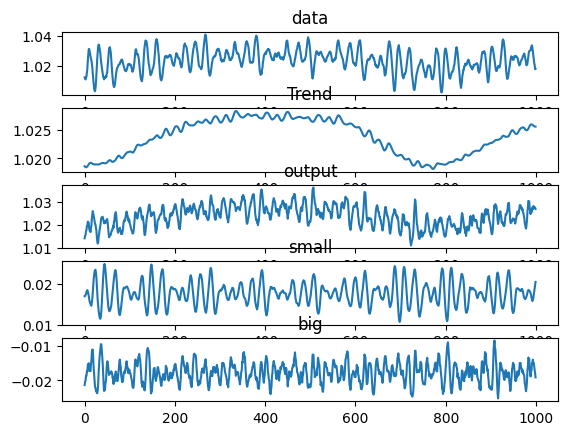

torch.Size([1, 1, 5600])
torch.Size([1, 1, 5600])


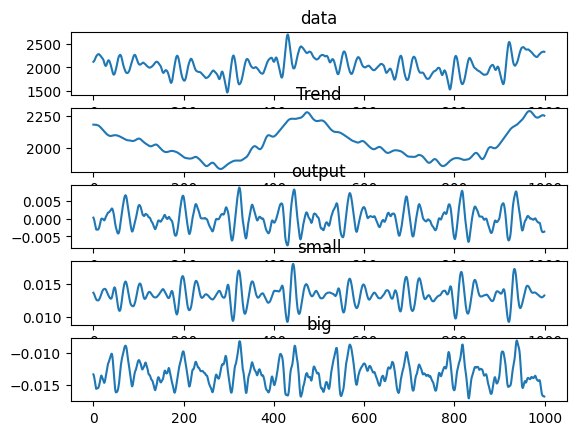

In [1]:
# 滤波
import predictNet
# from Toolkit import *
import pandas as pd
import numpy as np
import torch
import matplotlib.pylab as plt

# 中值滤波降采样  1 1000plt.subplot(211)
def avgpool(*,data,stride):
    length = data.shape[-1]
    ans = torch.zeros(1,1,int(length/stride)-2)
    for i in range(int(length/stride)-2):
        ans[0][0][i] = torch.sum(data[0][0][i*stride:i*stride+stride])/stride
    return ans

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

begin = 7500
end = begin+25700
data = np.array(pd.read_csv('/root/zqh/BCGOrigin_Data/pa6-bcg.csv'))[begin:end]

# begin = 7500
# end = begin+5700
# data = np.array(pd.read_csv('/root/zqh/BCGOrigin_Data/ZQH040601bcg.csv'))[begin:end]
# data = np.array(pd.read_csv('/root/zqh/BCGOrigin_Data/ZQH0329.csv'))[begin:end]

data = data.reshape(1,1,end-begin)
data = data.astype(np.float32)
data = torch.from_numpy(data)
data = avgpool(data=data,stride=8) # Kansas数据预处理

# data = data.view(1,1,data.shape[-1]).cuda() # cuda
data = data.view(1,1,data.shape[-1]) # 非 cuda

# 去趋势
deckernel_size = 101
avgpool = torch.nn.AvgPool1d(deckernel_size,stride=1)
T = avgpool(data) # 周期趋势
oral_data = data[0][0][deckernel_size//2 : data.shape[-1]-deckernel_size//2]
data = data[0][0][deckernel_size//2 : data.shape[-1]-deckernel_size//2] - T.squeeze(0).squeeze(0)
data = data.view(1,1,data.shape[-1])
print(data.shape)

# 模型训练
epoch = 500
# model1 = predictNet.first_1_net().to(device=device) # cuda
model1 = predictNet.predictNet(kernel_size1=21, kernel_size2=151) # 非 cuda
model1 = predictNet.trainPredictNet(model=model1,data=data,T=T,lr=0.001,epoch=epoch)
# torch.save(model1, '/root/zqh/Save_Model/model1.pth')

output = model1(data)
output1, output2 = model1.returnAns(data)
data = data.cpu()
output = output.cpu()
print(output.shape)
showbegin = 1000
showend = 2000
plt.subplot(511)
plt.title("data")
plt.plot(oral_data[showbegin:showend])
plt.subplot(512)
plt.title("Trend")
plt.plot(T[0][0][showbegin:showend])
plt.subplot(513)
plt.title("output")
plt.plot(output[0][0][showbegin:showend].detach().numpy())
plt.subplot(514)
plt.title("small")
plt.plot(output1[0][0][showbegin:showend].detach().numpy())
plt.subplot(515)
plt.title("big")
plt.plot(output2[0][0][showbegin:showend].detach().numpy())
plt.show()

# 测试数据
begin = 8000
end = begin+5700
data = np.array(pd.read_csv('/root/zqh/BCGOrigin_Data/ZQH040601bcg.csv'))[begin:end]
# data = np.array(pd.read_csv('/root/zqh/BCGOrigin_Data/ZQH0329.csv'))[begin:end]
data = data.reshape(1,1,end-begin)
data = data.astype(np.float32)
data = torch.from_numpy(data)
# data = avgpool(data=data,stride=8) # Kansas数据预处理

# data = data.view(1,1,data.shape[-1]).cuda() # cuda
data = data.view(1,1,data.shape[-1]) # 非 cuda
# 去趋势
# deckernel_size = 151
avgpool = torch.nn.AvgPool1d(deckernel_size,stride=1)
T = avgpool(data) # 周期趋势
oral_data = data[0][0][deckernel_size//2 : data.shape[-1]-deckernel_size//2]
data = data[0][0][deckernel_size//2 : data.shape[-1]-deckernel_size//2] - T.squeeze(0).squeeze(0)
data = data.view(1,1,data.shape[-1])
print(data.shape)
# 输入模型得到结果
output = model1(data)
output1, output2 = model1.returnAns(data)
data = data.cpu()
output = output.cpu()
print(output.shape)

plt.subplot(511)
plt.title("data")
plt.plot(oral_data[showbegin:showend])
plt.subplot(512)
plt.title("Trend")
plt.plot(T[0][0][showbegin:showend])
plt.subplot(513)
plt.title("output")
plt.plot(output[0][0][showbegin:showend].detach().numpy())
plt.subplot(514)
plt.title("small")
plt.plot(output1[0][0][showbegin:showend].detach().numpy())
plt.subplot(515)
plt.title("big")
plt.plot(output2[0][0][showbegin:showend].detach().numpy())
plt.show()